In [11]:
import os

os.chdir('/home/jwdase/projects/language-detection/src')

In [12]:
base = "/om2/user/moshepol/prosody/data/low_pass_data"

In [13]:
import pickle

with open(f'{base}/speakers.pkl', 'rb') as f:
    data = pickle.load(f)

In [14]:
import numpy as np

groups = list(data.keys())

train_speak = []
test_speak = []
val_speak = []

for group in groups:
    train_speak.append(np.mean(data[group]['train']))
    test_speak.append(np.mean(data[group]['test']))
    val_speak.append(np.mean(data[group]['val']))

bar_width = 0.25
index = np.arange(len(groups))

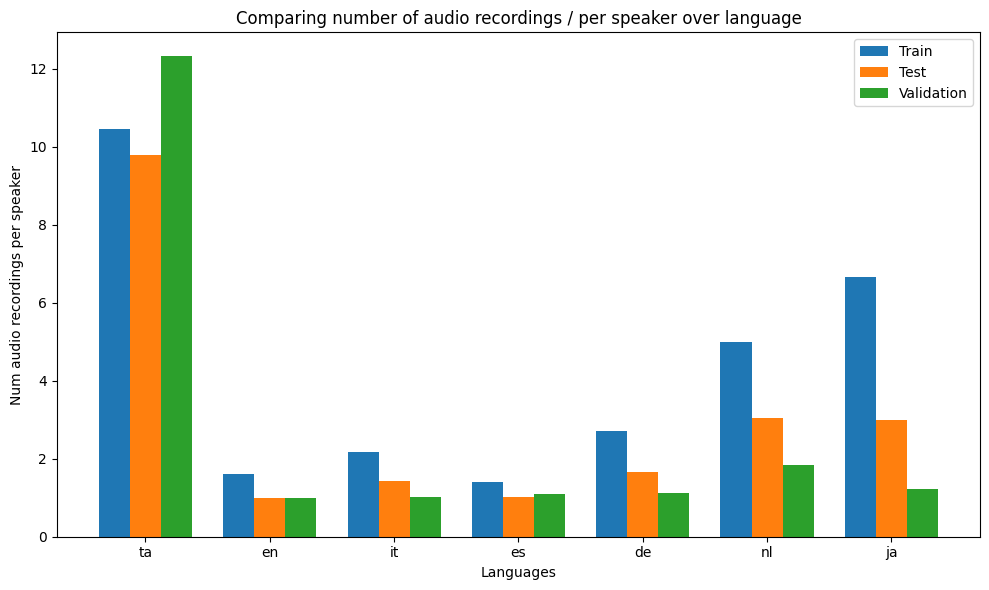

In [15]:
import matplotlib.pyplot as plt

# Create plot
plt.figure(figsize=(10, 6))
plt.bar(index, train_speak, bar_width, label='Train')
plt.bar(index + bar_width, test_speak, bar_width, label='Test')
plt.bar(index + 2 * bar_width, val_speak, bar_width, label='Validation')

# Set labels
plt.xlabel('Languages')
plt.ylabel('Num audio recordings per speaker')
plt.title('Comparing number of audio recordings / per speaker over language')
plt.xticks(index + bar_width, groups)  # Center x-tick labels
plt.legend()
plt.tight_layout()

plt.savefig('plots/figures/unique.pdf')